In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

In [2]:
DEVICE = 'cuda:0'

In [3]:
def model(z, sigma = .1):
    z = z * np.pi
    x = np.sin(z)**2
    return x

In [4]:
def noisemodel(x, z, sigma = 0.1):
    x = x + np.random.randn(*x.shape) * sigma
    return x

In [5]:
z0 = np.ones(20) * 0.25
zdim = len(z0)
x0 = model(z0)
print(x0, zdim)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5] 20


In [6]:
cache = swyft.MemoryCache(zdim = zdim, xshape = x0.shape)

Creating new cache.


In [7]:
MAX_EPOCHS = 100
EXPECTED_N = 20000

In [8]:
intensity = swyft.get_unit_intensity(expected_n=EXPECTED_N, dim=zdim)
cache.grow(intensity)
cache.simulate(model)
points = swyft.Points(cache, intensity, noisemodel)
re = swyft.RatioEstimator(points, device=DEVICE)
re.train(max_epochs=MAX_EPOCHS, batch_size=32, lr_schedule=[1e-3, 3e-4, 1e-4])

Simulate:   0%|          | 0/20183 [00:00<?, ?it/s]

Adding 20183 new samples. Run simulator!


Simulate: 100%|██████████| 20183/20183 [00:15<00:00, 1263.45it/s]


yshape (shape of features between head and legs): 20
Start training
No new simulator runs required.
LR iteration 0
Validation loss: 2120.0950984954834
Validation loss: 2069.237874984741
Validation loss: 2035.6011028289795
Validation loss: 2018.159755706787
Validation loss: 2010.3552417755127
Validation loss: 2006.4089584350586
Validation loss: 2011.5785465240479
Total epochs: 7
LR iteration 1
Validation loss: 1981.939260482788
Validation loss: 1982.5257377624512
Total epochs: 2
LR iteration 2
Validation loss: 1960.5311527252197
Validation loss: 1963.1110610961914
Total epochs: 2


In [9]:
z, p = re.posterior(x0, [19])

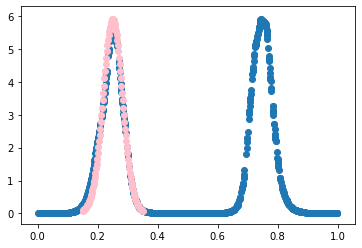

In [10]:
plt.scatter(z,p);
plt.scatter(np.linspace(0.15,0.35,100),
            np.max(p)*np.exp(-0.5*(model(0.25)-model(np.linspace(0.15,0.35,100)))**2/0.1**2),c='pink');

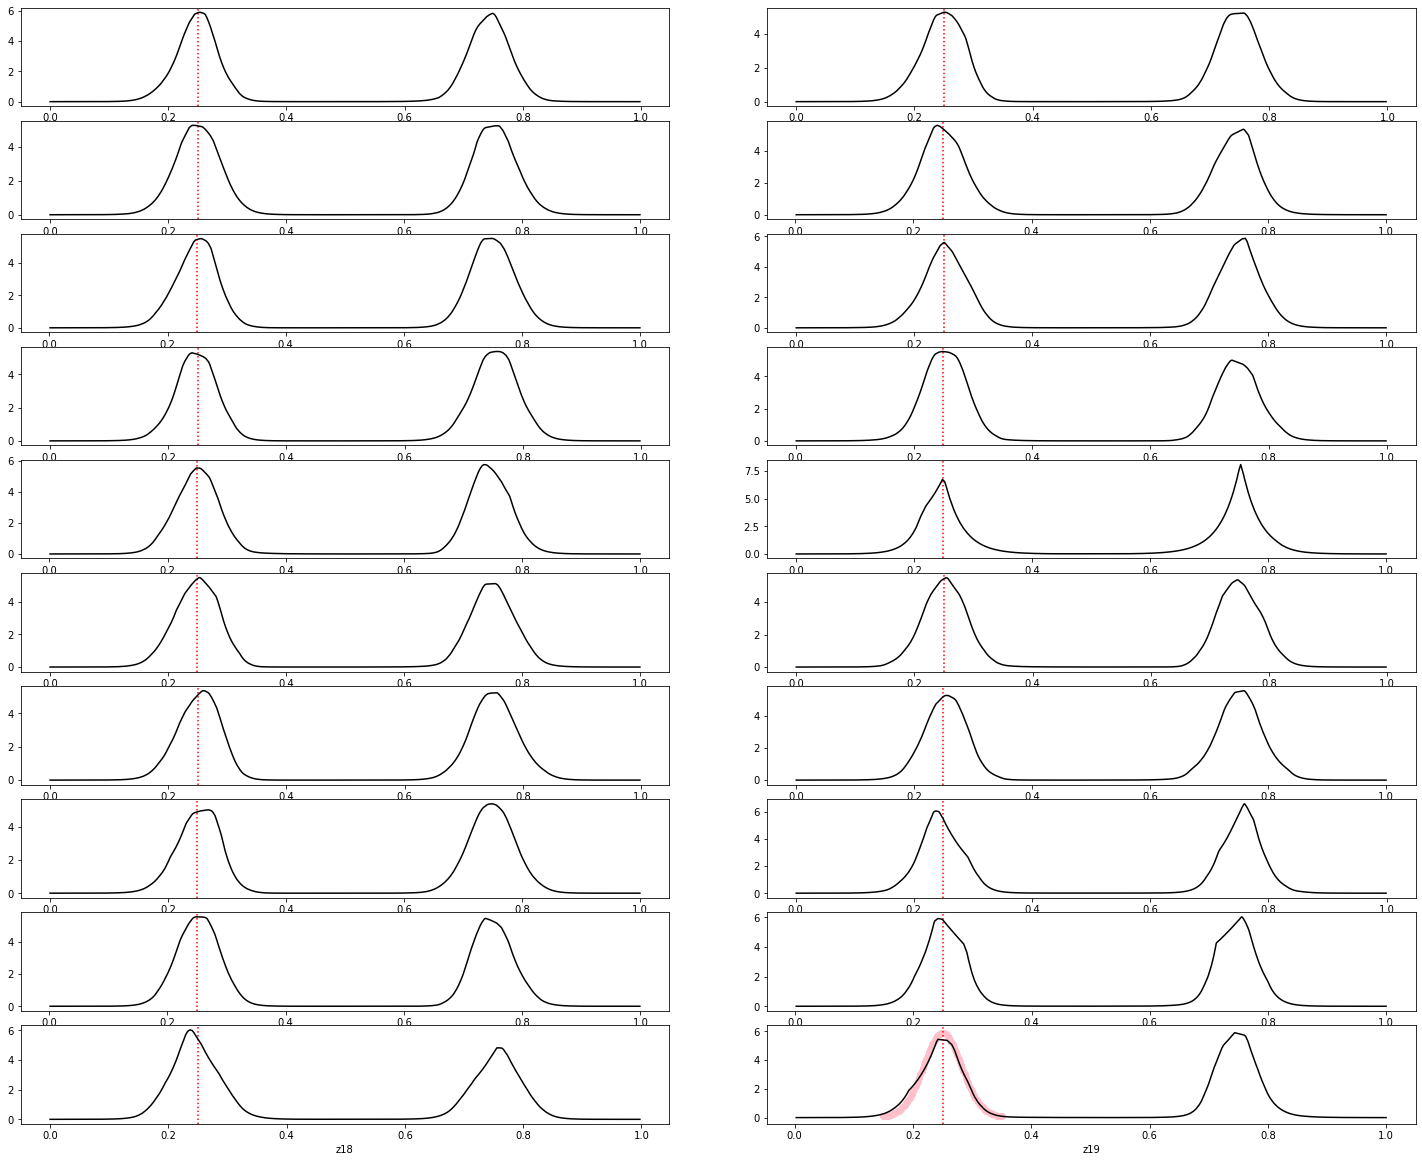

In [11]:
swyft.plot1d(re, x0 = x0, z0 = z0, cmap = 'Greys', dims = (25, 20),ncol=2)
plt.scatter(np.linspace(0.15,0.35,100),
            np.max(p)*np.exp(-0.5*(model(0.25)-model(np.linspace(0.15,0.35,100)))**2/0.1**2),c='pink');

In [12]:
re2 = swyft.RatioEstimator(points, combinations = [[0, 1]], device=DEVICE)
re2.train(max_epochs=MAX_EPOCHS, batch_size=32, lr_schedule=[1e-3, 3e-4, 1e-4,0.5e-4])

yshape (shape of features between head and legs): 20
Start training
LR iteration 0
Validation loss: 87.15875244140625
Validation loss: 72.90354144573212
Validation loss: 68.2355524301529
Validation loss: 64.08839961886406
Validation loss: 62.36970782279968
Validation loss: 65.75730296969414
Total epochs: 6
LR iteration 1
Validation loss: 57.278110057115555
Validation loss: 58.862169578671455
Total epochs: 2
LR iteration 2
Validation loss: 59.927173644304276
Validation loss: 58.8557198792696
Validation loss: 56.08172917366028
Validation loss: 57.39038588106632
Total epochs: 4
LR iteration 3
Validation loss: 57.74763876199722
Validation loss: 56.10609379410744
Validation loss: 55.36722856760025
Validation loss: 55.944460690021515
Total epochs: 4


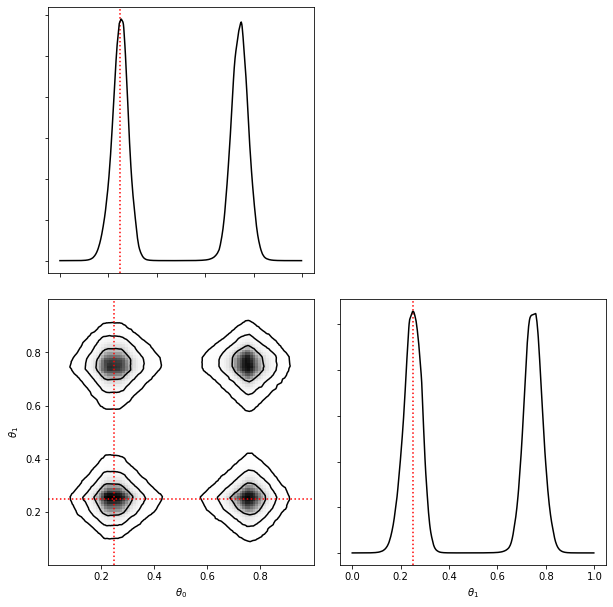

In [13]:
swyft.corner(re, re2, x0 = x0, z0 = z0, cmap = 'Greys', dim = 10, params=[0,1],
       labels=['$\\theta_0$','$\\theta_1$'],max_n_points=10000);